# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]


## Load and merge the datasets

In [3]:
df = pd.read_csv('../Data\Load_21-24.csv')

<>:1: SyntaxWarning: invalid escape sequence '\L'
<>:1: SyntaxWarning: invalid escape sequence '\L'
C:\Users\TimPr\AppData\Local\Temp\ipykernel_1496\49942854.py:1: SyntaxWarning: invalid escape sequence '\L'
  df = pd.read_csv('../Data\Load_21-24.csv')


In [ ]:
df.head()

,Time (CET/CEST),Day-ahead Total Load Forecast [MW] - BZN|DE-LU,Actual Total Load [MW] - BZN|DE-LU
0,01.01.2021 00:00 - 01.01.2021 00:15,43935.0,45458.0
1,01.01.2021 00:15 - 01.01.2021 00:30,43738.0,45237.0
2,01.01.2021 00:30 - 01.01.2021 00:45,43247.0,44886.0
3,01.01.2021 00:45 - 01.01.2021 01:00,43162.0,44585.0
4,01.01.2021 01:00 - 01.01.2021 01:15,42453.0,43952.0


## Data dimensions and description:

In [31]:
# Number of samples
num_samples = df.shape[0]

# Number of features
num_features = df.shape[1]

# Display these dataset characteristics
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(df.head())
print(df.info())


Number of samples: 140272
Number of features: 8
Example data:
                       Time (CET/CEST)  \
0  01.01.2021 00:00 - 01.01.2021 00:15   
1  01.01.2021 00:15 - 01.01.2021 00:30   
2  01.01.2021 00:30 - 01.01.2021 00:45   
3  01.01.2021 00:45 - 01.01.2021 01:00   
4  01.01.2021 01:00 - 01.01.2021 01:15   

  Day-ahead Total Load Forecast [MW] - BZN|DE-LU  \
0                                        43935.0   
1                                        43738.0   
2                                        43247.0   
3                                        43162.0   
4                                        42453.0   

  Actual Total Load [MW] - BZN|DE-LU          start_time            end_time  \
0                            45458.0 2021-01-01 00:00:00 2021-01-01 00:15:00   
1                            45237.0 2021-01-01 00:15:00 2021-01-01 00:30:00   
2                            44886.0 2021-01-01 00:30:00 2021-01-01 00:45:00   
3                            44585.0 2021-01-01 00:4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140272 entries, 0 to 140271
Data columns (total 8 columns):
 #   Column                                          Non-Null Count   Dtype         
---  ------                                          --------------   -----         
 0   Time (CET/CEST)                                 140272 non-null  object        
 1   Day-ahead Total Load Forecast [MW] - BZN|DE-LU  140056 non-null  object        
 2   Actual Total Load [MW] - BZN|DE-LU              140250 non-null  object        
 3   start_time                                      140272 non-null  datetime64[ns]
 4   end_time                                        140272 non-null  datetime64[ns]
 5   year                                            140272 non-null  int32         
 6   month                                           140272 non-null  int32         
 7   day                                             140272 non-null  int32         
dtypes: datetime64[ns](2), int32(3), obj

## Handling Missing Values

[Identify any missing values in the dataset, and describe your approach to handle them if there are any. If there are no missing values simply indicate that there are none.]


In [33]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values




Time (CET/CEST)                                   0
Day-ahead Total Load Forecast [MW] - BZN|DE-LU    0
Actual Total Load [MW] - BZN|DE-LU                0
start_time                                        0
end_time                                          0
year                                              0
month                                             0
day                                               0
dtype: int64

In [ ]:
df['Day-ahead Total Load Forecast [MW] - BZN|DE-LU'].ffill(inplace=True)
df['Actual Total Load [MW] - BZN|DE-LU'].ffill(inplace=True)

# convert the time and do some feature engineering:

In [13]:
# Step 1: Split the timespan into start and end times
df[['start_time', 'end_time']] = df['Time (CET/CEST)'].str.split(' - ', expand=True)

# Step 2: Convert both to datetime format
df['start_time'] = pd.to_datetime(df['start_time'], format='%d.%m.%Y %H:%M')
df['end_time'] = pd.to_datetime(df['end_time'], format='%d.%m.%Y %H:%M')

# Step 3: Feature engineering
df['year'] = df['start_time'].dt.year
df['month'] = df['start_time'].dt.month
df['day'] = df['start_time'].dt.day


In [16]:
df.columns

Index(['Time (CET/CEST)', 'Day-ahead Total Load Forecast [MW] - BZN|DE-LU',
       'Actual Total Load [MW] - BZN|DE-LU', 'start_time', 'end_time', 'year',
       'month', 'day'],
      dtype='object')

## Feature Distributions

[Plot the distribution of various features and target variables. Comment on the skewness, outliers, or any other observations.]


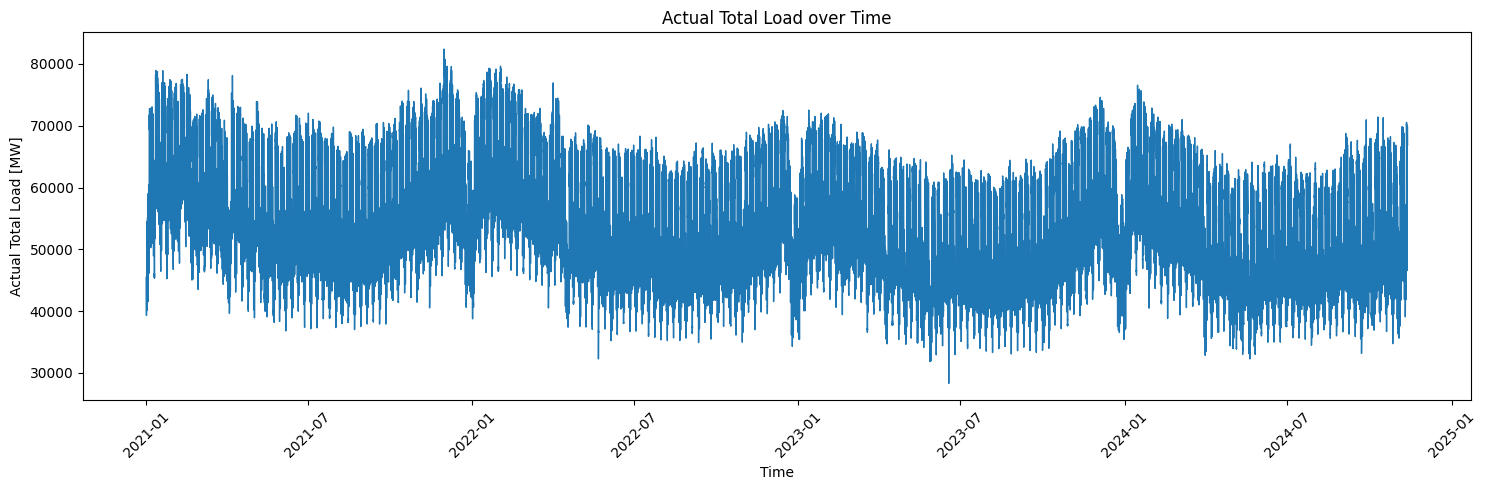

In [38]:
# Convert columns to numeric
df['Day-ahead Total Load Forecast [MW] - BZN|DE-LU'] = pd.to_numeric(df['Day-ahead Total Load Forecast [MW] - BZN|DE-LU'], errors='coerce')
df['Actual Total Load [MW] - BZN|DE-LU'] = pd.to_numeric(df['Actual Total Load [MW] - BZN|DE-LU'], errors='coerce')

# Plotting the actual load over the start time
plt.figure(figsize=(15, 5))
plt.plot(df['start_time'], df['Actual Total Load [MW] - BZN|DE-LU'], label='Actual Load', color='tab:blue', linewidth = 1)
plt.xlabel('Time')
plt.ylabel('Actual Total Load [MW]')
plt.title('Actual Total Load over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Saving the files for the next steps:

In [ ]:
df.to_csv("../data/load_value_de_2021_2024.csv", index=False)

## Possible Biases

[Investigate the dataset for any biases that could affect the model’s performance and fairness (e.g., class imbalance, historical biases).]


In [ ]:
# Example: Checking for class imbalance in a classification problem
# sns.countplot(x='target_variable', data=df)

# Your code to investigate possible biases goes here


## Correlations

[Explore correlations between features and the target variable, as well as among features themselves.]


In [ ]:
# Example: Plotting a heatmap to show feature correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()
